num_nodes: 1005
num_edges: 16706
avg_degree: 33.245771144278606
density: 0.03311331787278746
diameter: 7
avg_clustering: 0.3993549664221543
transitivity: 0.26739242877040204
avg_shortest_path: 2.586933824816466
degree_distribution: Counter({1: 78, 2: 46, 3: 42, 4: 33, 5: 28, 7: 25, 6: 21, 29: 20, 11: 20, 8: 20, 30: 19, 25: 18, 20: 18, 24: 16, 22: 16, 13: 16, 21: 15, 19: 15, 12: 15, 9: 15, 26: 14, 15: 14, 14: 14, 10: 14, 23: 13, 28: 12, 18: 12, 16: 12, 37: 11, 36: 11, 31: 11, 27: 11, 32: 10, 51: 9, 46: 9, 45: 9, 41: 9, 38: 9, 34: 9, 17: 9, 55: 8, 52: 8, 47: 8, 42: 8, 35: 8, 33: 8, 54: 7, 53: 7, 48: 7, 44: 7, 43: 7, 40: 7, 84: 6, 74: 6, 63: 6, 50: 6, 39: 6, 83: 5, 73: 5, 71: 5, 64: 5, 62: 5, 61: 5, 56: 5, 49: 5, 86: 4, 72: 4, 70: 4, 60: 4, 57: 4, 142: 3, 106: 3, 92: 3, 91: 3, 85: 3, 80: 3, 76: 3, 68: 3, 59: 3, 58: 3, 146: 2, 141: 2, 139: 2, 138: 2, 131: 2, 121: 2, 119: 2, 101: 2, 98: 2, 87: 2, 81: 2, 69: 2, 67: 2, 65: 2, 347: 1, 234: 1, 233: 1, 221: 1, 218: 1, 216: 1, 185: 1, 180: 1, 177

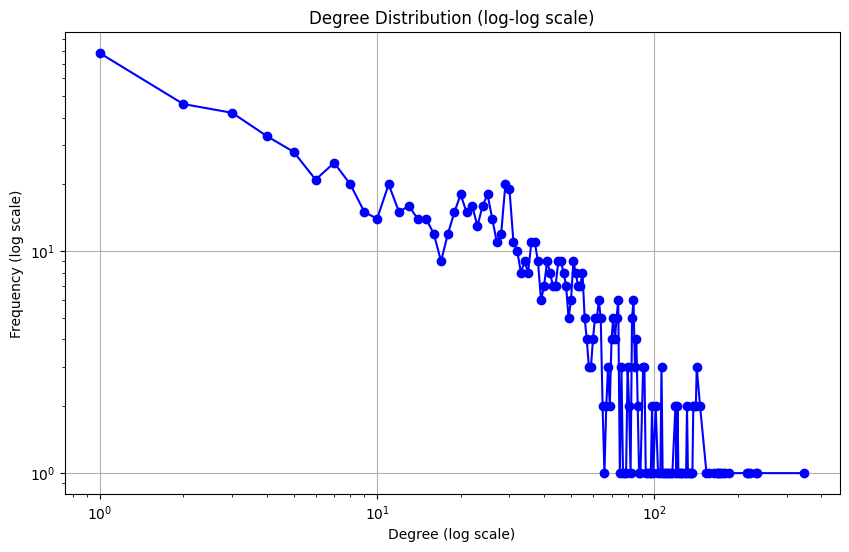

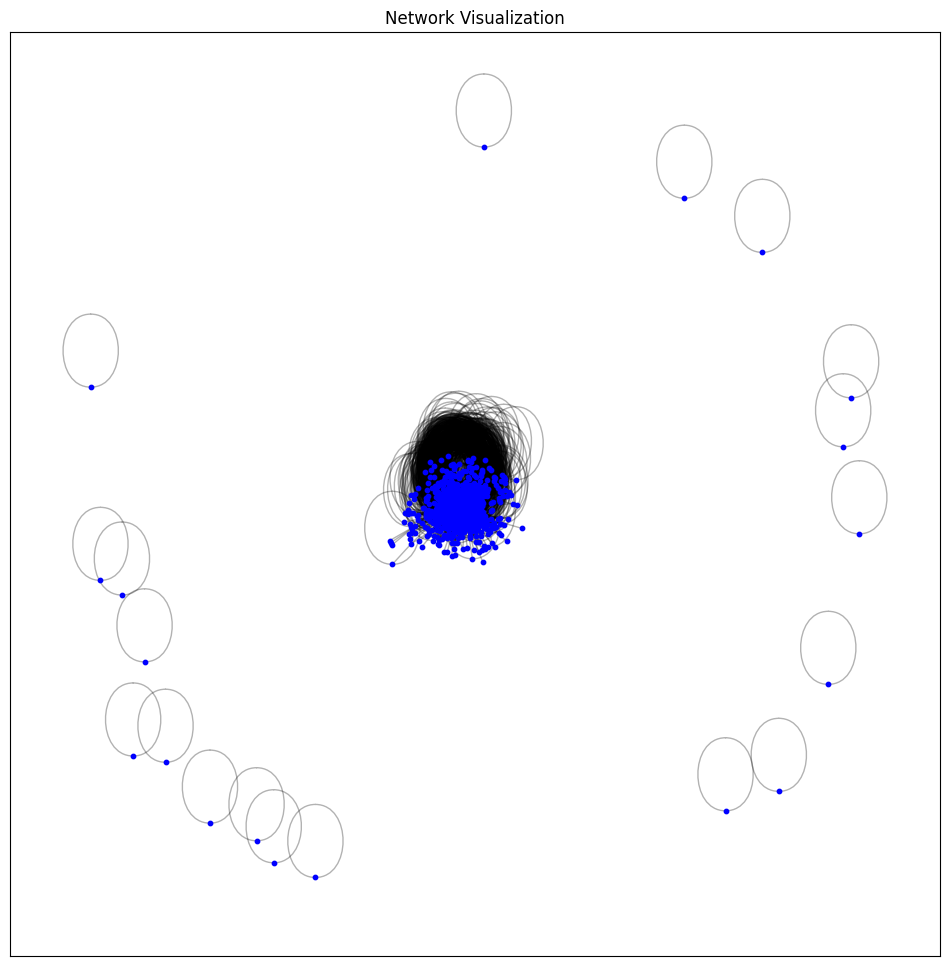

In [1]:
import networkx as nx
import pandas as pd
from collections import Counter
import numpy as np
import matplotlib.pyplot as plt

EMAIL_FILE_PATH = 'desktop/email.txt'  
DEPARTMENT_FILE_PATH = 'desktop/email2.txt'  

def create_network(email_path, department_path):
    G = nx.Graph()
    with open(department_path, 'r') as f:
        for line in f:
            parts = line.strip().split()
            if len(parts) == 2:
                node_id, department = parts
                G.add_node(node_id, department=int(department))
    
    with open(email_path, 'r') as f:
        for line in f:
            parts = line.strip().split()
            if len(parts) == 2:
                node1, node2 = parts
                G.add_edge(node1, node2) 
                
    return G
    
def calculate_network_metrics(G):
    metrics = {}
    metrics['num_nodes'] = G.number_of_nodes()
    metrics['num_edges'] = G.number_of_edges()
    degrees = [d for _, d in G.degree()]
    metrics['avg_degree'] = np.mean(degrees)
    metrics['density'] = nx.density(G)
    
    try:
        Gcc = sorted(nx.connected_components(G), key=len, reverse=True)[0]
        G_sub = G.subgraph(Gcc)
        metrics['diameter'] = nx.diameter(G_sub)
    except nx.NetworkXError:
        metrics['diameter'] = -1
    
    metrics['avg_clustering'] = nx.average_clustering(G) #Clustering Coefficient
    metrics['transitivity'] = nx.transitivity(G)

    try:
        metrics['avg_shortest_path'] = nx.average_shortest_path_length(G_sub)
    except nx.NetworkXError:
        metrics['avg_shortest_path'] = -1

    degree_sequence = sorted([d for _, d in G.degree()], reverse=True)
    metrics['degree_distribution'] = Counter(degree_sequence)
    metrics['assortativity'] = nx.degree_assortativity_coefficient(G)
    metrics['top_degree'] = sorted(G.degree, key=lambda x: x[1], reverse=True)[:5]
    metrics['top_betweenness'] = sorted(nx.betweenness_centrality(G).items(), key=lambda x: x[1], reverse=True)[:5]
    metrics['top_closeness'] = sorted(nx.closeness_centrality(G).items(), key=lambda x: x[1], reverse=True)[:5]
    metrics['top_pagerank'] = sorted(nx.pagerank(G).items(), key=lambda x: x[1], reverse=True)[:5]
    return metrics

def plot_degree_distribution(degree_dist):
    degrees, frequencies = zip(*degree_dist.items())
    
    plt.figure(figsize=(10, 6))
    plt.loglog(degrees, frequencies, 'bo-')
    plt.xlabel('Degree (log scale)')
    plt.ylabel('Frequency (log scale)')
    plt.title('Degree Distribution (log-log scale)')
    plt.grid(True)
    plt.show()

def visualize_graph(G):
    plt.figure(figsize=(12, 12))
    pos = nx.spring_layout(G, seed=42)
    nx.draw_networkx_nodes(G, pos, node_size=10, node_color="blue")
    nx.draw_networkx_edges(G, pos, alpha=0.3)
    plt.title("Network Visualization")
    plt.show()

G = create_network(EMAIL_FILE_PATH, DEPARTMENT_FILE_PATH)
metrics = calculate_network_metrics(G)

for key, value in metrics.items():
    print(f"{key}: {value}")

plot_degree_distribution(metrics['degree_distribution'])
visualize_graph(G)